<a href="https://colab.research.google.com/github/Elizabeth-George-M/Projects/blob/main/Research_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anti Money Laundering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, GridSearchCV,train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [ ]:
#Loading the Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/SAML-D.csv")

In [ ]:
df.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [ ]:
df.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,9504852.00,9504852.00,9504852.00,9504852.00
mean,5006619409.97,5006006469.65,8762.97,0.00
std,2885813892.13,2884762983.27,25614.95,0.03
min,9018.00,9018.00,3.73,0.00
25%,2513133245.00,2513219464.00,2143.69,0.00
50%,5001016667.00,5002572491.50,6113.72,0.00
75%,7505051146.00,7502397427.00,10458.46,0.00
max,9999986843.00,9999971095.00,12618498.40,1.00


In [ ]:
#Datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [ ]:
#Shape of the dataset
df_rows=df.shape[0]
df_columns=df.shape[1]
print('The number of rows in the dataset is :- ',df_rows)
print('The number of columns in the dataset is :- ',df_columns)


The number of rows in the dataset is :-  9504852
The number of columns in the dataset is :-  12


In [ ]:
#Checking for null values
df.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

#Label encoding


In [ ]:
#The columns to be label encoded
print(df[['Time', 'Date']].dtypes)

Time    object
Date    object
dtype: object


In [ ]:
#Label encoding the Laundering_type
label_encoder = LabelEncoder()
columns=['Payment_currency','Received_currency','Sender_bank_location','Receiver_bank_location','Payment_type','Laundering_type']
for col in columns:
  df[col]=label_encoder.fit_transform(df[col])


In [ ]:
#Laundering_type
df

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,10,10,16,16,1,0,11
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,10,1,16,15,5,0,14
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,10,10,16,16,3,0,20
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,10,10,16,16,0,0,13
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,10,10,16,16,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,10,10,16,16,0,0,20
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,10,10,16,16,6,0,20
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,10,10,16,16,0,0,20
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,10,10,16,16,0,0,13


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#creating new columns for Year,Month,Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Year,Month,Day
0,2024-04-19 10:35:19,2022-10-07,8724731955,2769355426,1459.15,10,10,16,16,1,0,11,2022,10,7
1,2024-04-19 10:35:20,2022-10-07,1491989064,8401255335,6019.64,10,1,16,15,5,0,14,2022,10,7
2,2024-04-19 10:35:20,2022-10-07,287305149,4404767002,14328.44,10,10,16,16,3,0,20,2022,10,7
3,2024-04-19 10:35:21,2022-10-07,5376652437,9600420220,11895.00,10,10,16,16,0,0,13,2022,10,7
4,2024-04-19 10:35:21,2022-10-07,9614186178,3803336972,115.25,10,10,16,16,1,0,11,2022,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,2024-04-19 10:57:01,2023-08-23,2453933570,519744068,2247.25,10,10,16,16,0,0,20,2023,8,23
9504848,2024-04-19 10:57:06,2023-08-23,9805510177,5416607878,927.18,10,10,16,16,6,0,20,2023,8,23
9504849,2024-04-19 10:57:06,2023-08-23,7282330957,2995527149,1455.14,10,10,16,16,0,0,20,2023,8,23
9504850,2024-04-19 10:57:11,2023-08-23,940337377,4812815165,25995.70,10,10,16,16,0,0,13,2023,8,23


#EDA

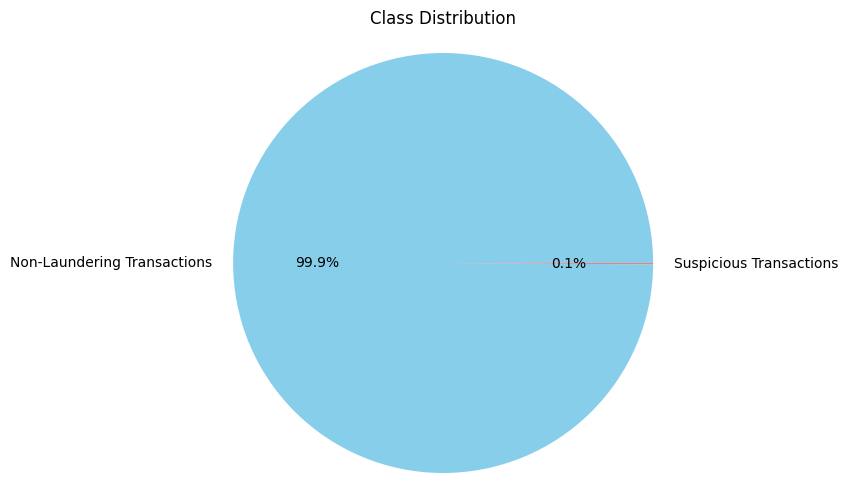

In [ ]:
class_distribution = df['Is_laundering'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(class_distribution, labels=['Non-Laundering Transactions', 'Suspicious Transactions'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

plt.title('Class Distribution')
plt.axis('equal')

plt.show()

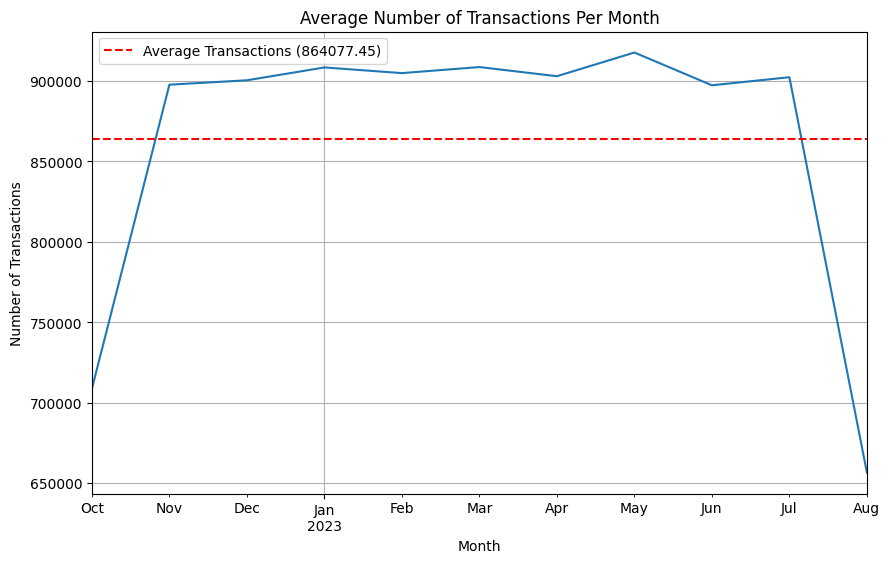

In [ ]:
monthly_transactions = df.resample('M', on='Date').size()
average_monthly_transactions = monthly_transactions.mean()


plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line')
plt.axhline(y=average_monthly_transactions, color='r', linestyle='--', label=f'Average Transactions ({average_monthly_transactions:.2f})')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Average Number of Transactions Per Month')
plt.legend()
plt.grid(True)
plt.show()

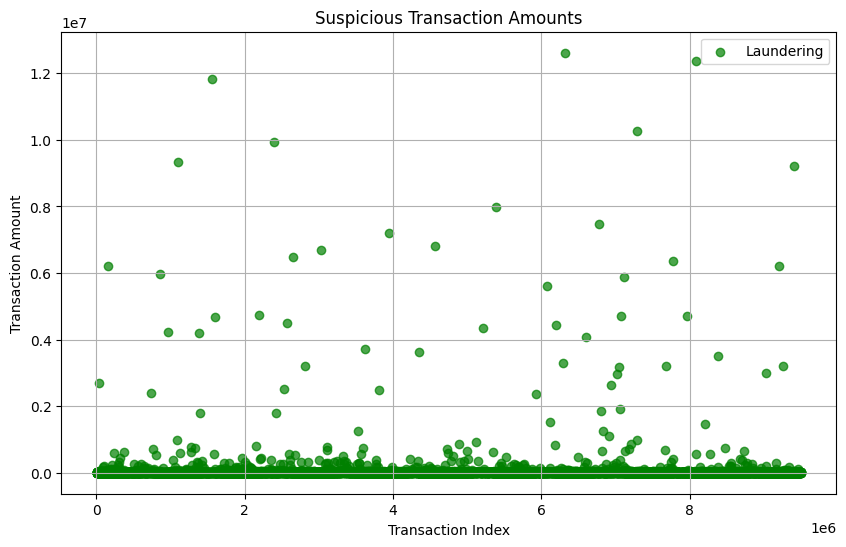

In [ ]:
# Separate the data
laundering_data = df[df['Is_laundering'] == 1]
non_laundering_data = df[df['Is_laundering'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(laundering_data.index, laundering_data['Amount'], color='green', label='Laundering', alpha=0.7)

plt.title('Suspicious Transaction Amounts')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
grouped = df.groupby('Laundering_type')
df_sam = pd.DataFrame()
for name, group in grouped:
    num_samples=min(5000 // len(grouped), len(group))
    sampled_group = group.sample(n=num_samples, random_state=42)
    df_sam = pd.concat([df_sam, sampled_group], axis=0)

df_sam = df_sam.sample(frac=1, random_state=42)

In [ ]:
representation = df_sam['Laundering_type'].value_counts()
print(representation)

Laundering_type
12    178
18    178
6     178
24    178
8     178
7     178
17    178
9     178
19    178
0     178
25    178
3     178
20    178
16    178
1     178
4     178
15    178
5     178
26    178
23    178
2     178
10    178
13    178
21    178
11    178
14    178
27    178
22     54
Name: count, dtype: int64


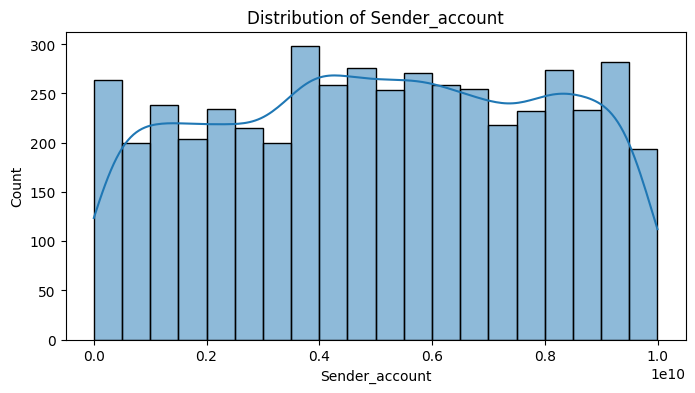

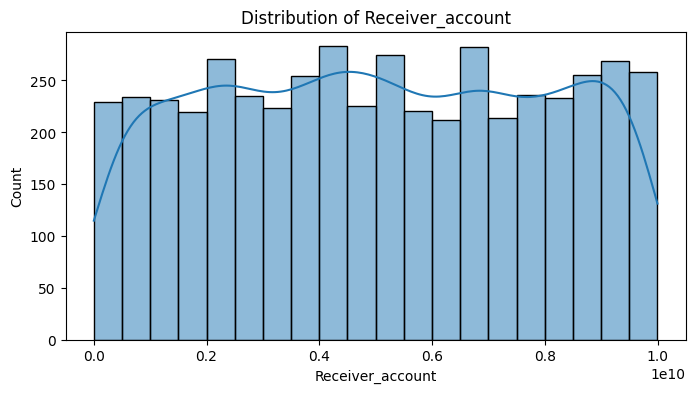

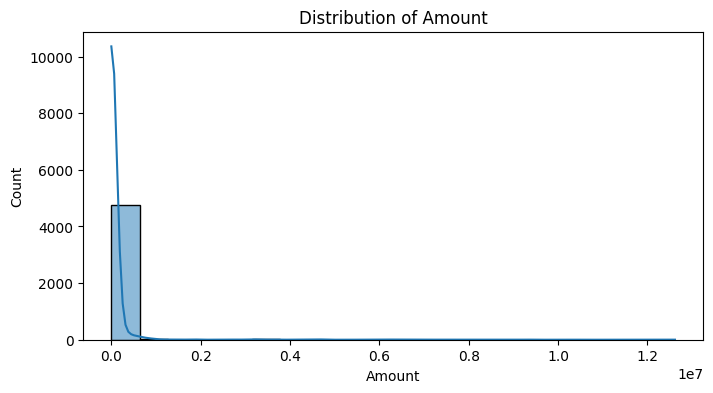

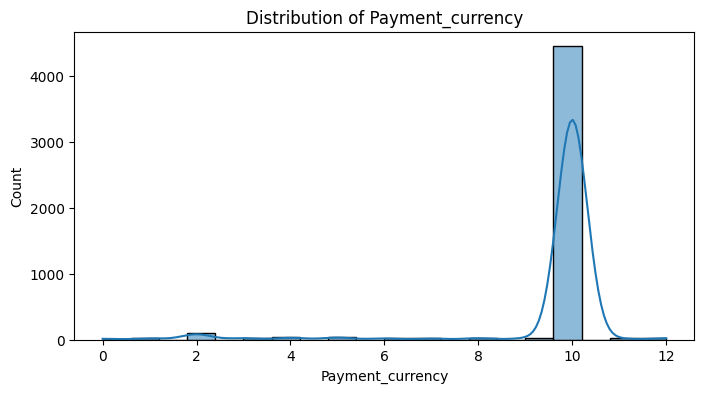

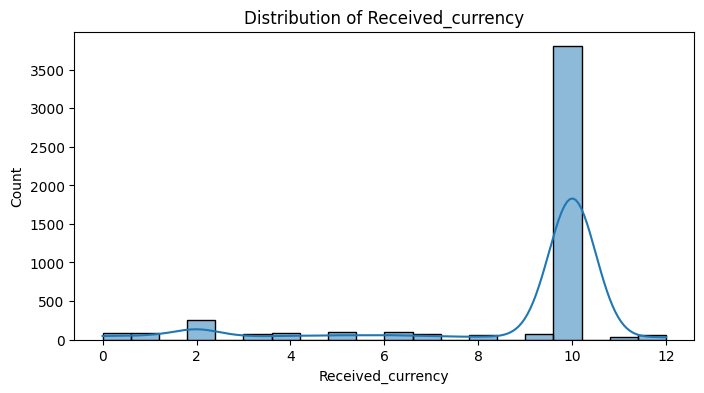

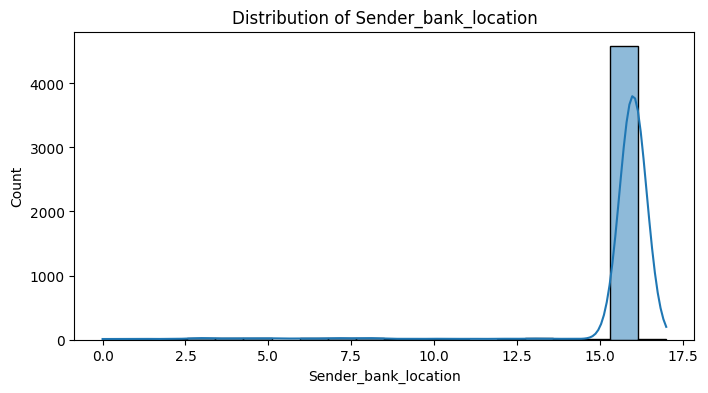

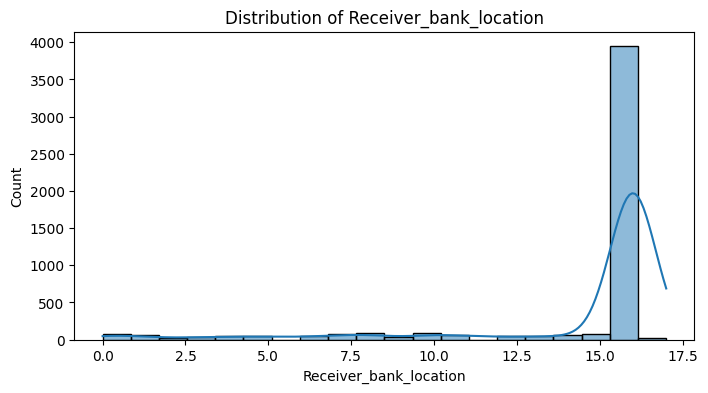

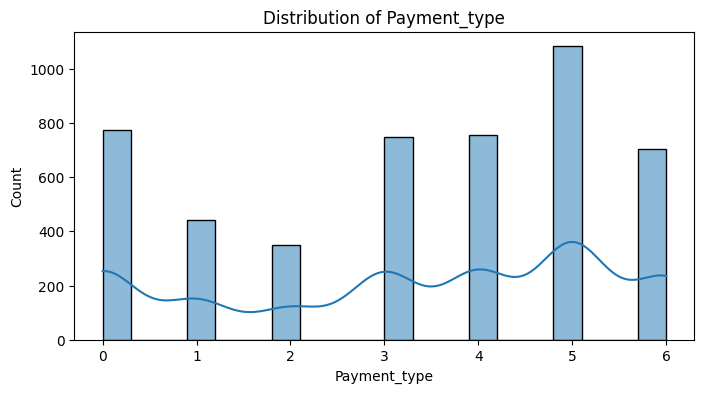

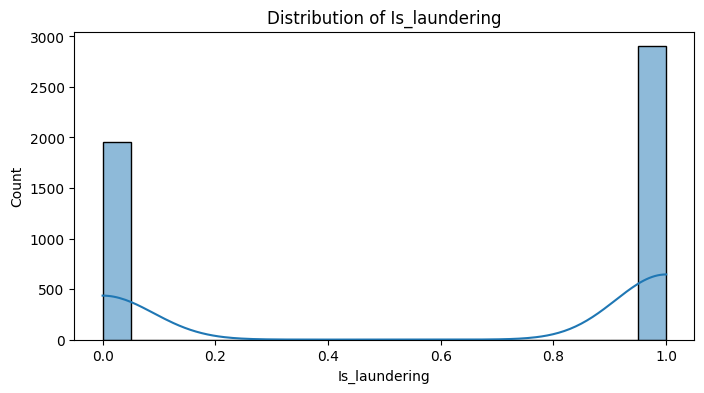

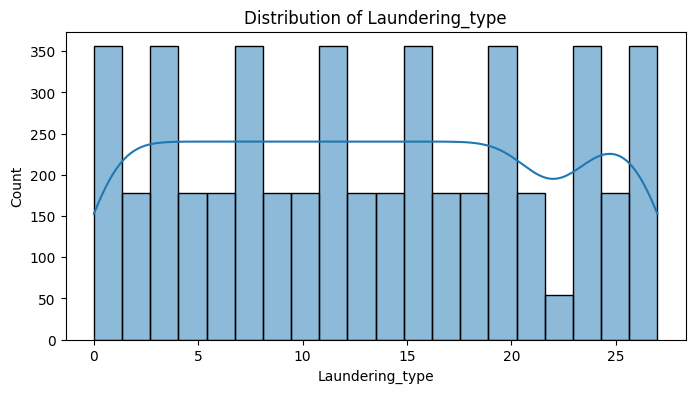

In [ ]:
numerical_features = df_sam.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_sam, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

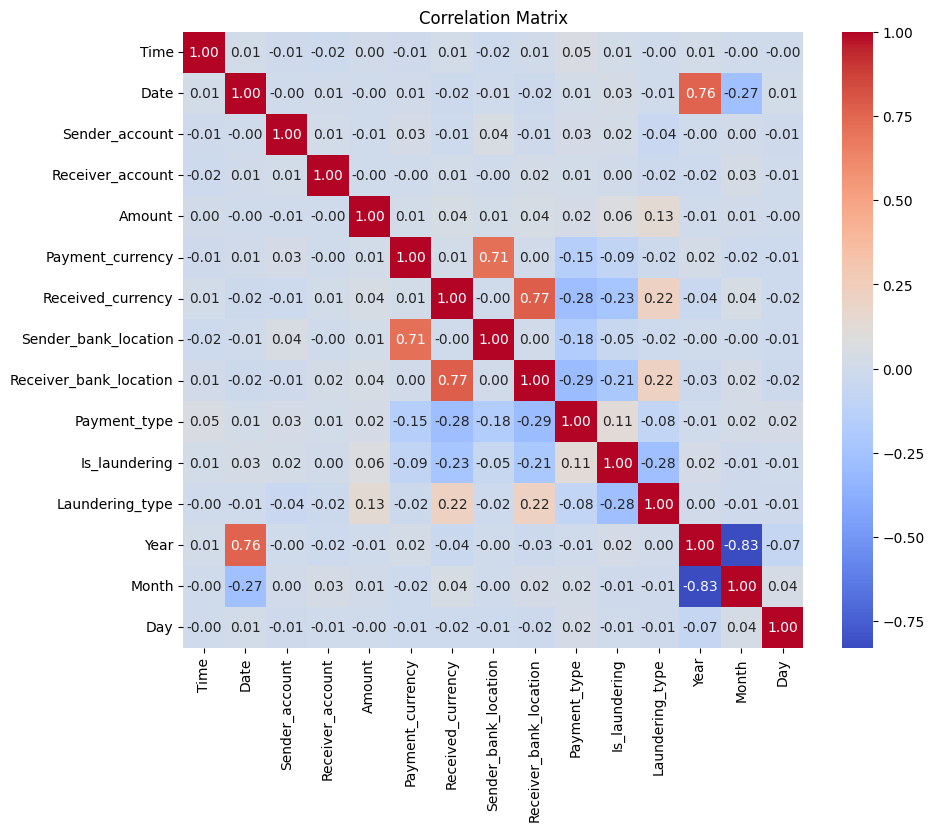

In [ ]:
correlation_matrix = df_sam.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
categorical_features = df_sam.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_sam, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

#Preprocessing


In [ ]:
df_sam

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Year,Month,Day
7930953,2024-04-19 15:06:39,2023-06-30,2185022364,5302249845,243.13,10,10,16,16,2,0,12,2023,6,30
7249987,2024-04-19 21:34:08,2023-06-07,8298306693,6675330448,1607.89,10,10,16,16,4,0,18,2023,6,7
4269984,2024-04-19 13:44:37,2023-02-27,3487806821,5160910532,11003.41,10,10,16,16,6,0,14,2023,2,27
1757924,2024-04-19 09:52:18,2022-12-06,1633651071,844839633,3466.06,10,10,16,16,1,0,11,2022,12,6
1143232,2024-04-19 10:05:52,2022-11-15,6271224614,6326395246,95331.70,10,10,16,16,0,0,21,2022,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833710,2024-04-19 10:03:03,2023-01-12,2510647780,281946850,2349.67,10,10,16,16,1,1,25,2023,1,12
2908492,2024-04-19 18:00:34,2023-01-14,9641155204,6060137737,17100.64,10,10,16,16,3,1,2,2023,1,14
9022749,2024-04-19 23:06:04,2023-08-06,4090925094,2358154827,16122.65,10,10,16,16,3,0,17,2023,8,6
3990266,2024-04-19 19:33:35,2023-02-18,931922222,391003970,166643.53,10,10,16,16,3,0,21,2023,2,18


In [ ]:
new_df=df_sam.drop(['Time','Date'],axis=1)
skewness=new_df.skew()
print(skewness)

Sender_account           -0.05
Receiver_account         -0.00
Amount                   13.22
Payment_currency         -3.85
Received_currency        -2.04
Sender_bank_location     -4.92
Receiver_bank_location   -2.57
Payment_type             -0.36
Is_laundering            -0.40
Laundering_type           0.05
Year                     -1.08
Month                     0.22
Day                       0.08
dtype: float64


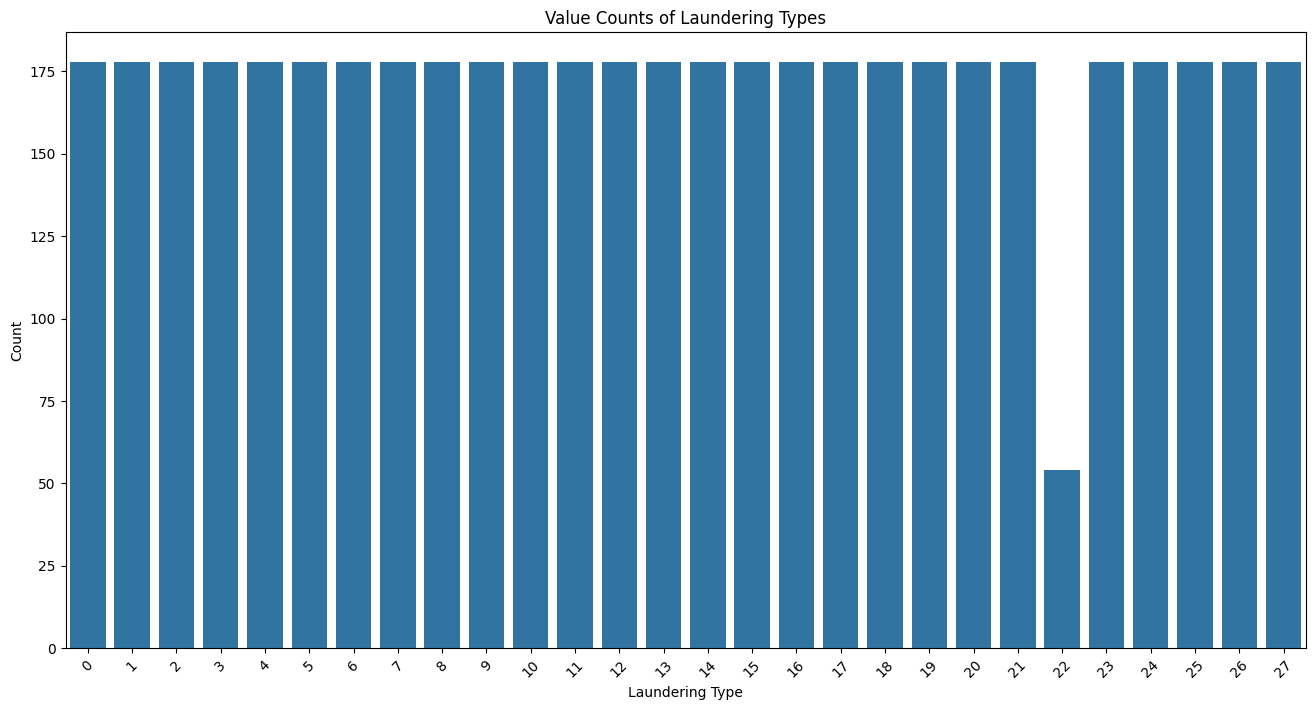

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df_sam, x='Laundering_type')
plt.xticks(rotation=45)
plt.xlabel('Laundering Type')
plt.ylabel('Count')
plt.title('Value Counts of Laundering Types')
plt.show()

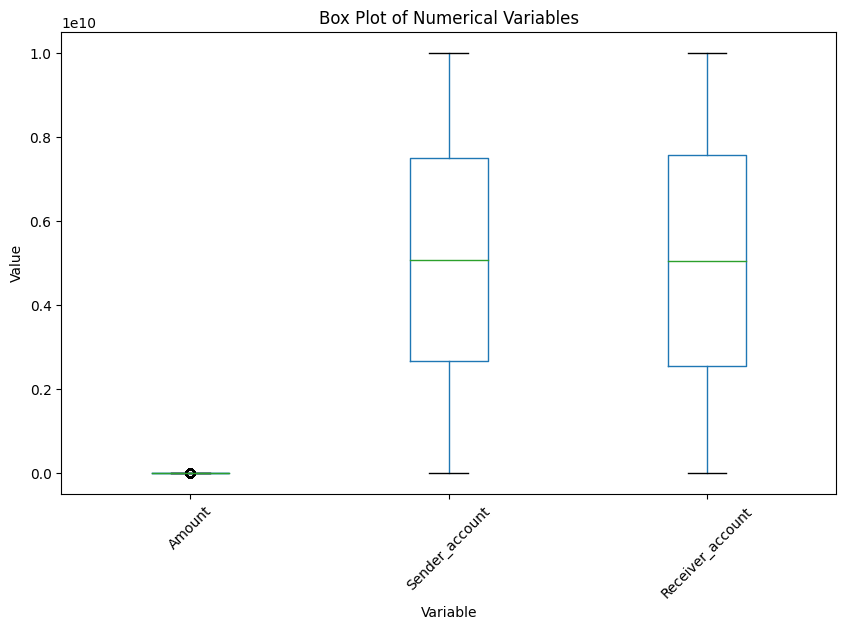

In [ ]:

plt.figure(figsize=(10, 6))
df_sam.boxplot(column=['Amount', 'Sender_account', 'Receiver_account'])
plt.title('Box Plot of Numerical Variables')
plt.ylabel('Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [ ]:
df_sam.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Year,Month,Day
7930953,2024-04-19 15:06:39,2023-06-30,2185022364,5302249845,243.13,10,10,16,16,2,0,12,2023,6,30
7249987,2024-04-19 21:34:08,2023-06-07,8298306693,6675330448,1607.89,10,10,16,16,4,0,18,2023,6,7
4269984,2024-04-19 13:44:37,2023-02-27,3487806821,5160910532,11003.41,10,10,16,16,6,0,14,2023,2,27
1757924,2024-04-19 09:52:18,2022-12-06,1633651071,844839633,3466.06,10,10,16,16,1,0,11,2022,12,6
1143232,2024-04-19 10:05:52,2022-11-15,6271224614,6326395246,95331.70,10,10,16,16,0,0,21,2022,11,15


In [ ]:
#R-forest
X=df_sam.drop(['Is_laundering','Laundering_type','Time','Date','Sender_account','Receiver_account'],axis=1)
y=df_sam['Is_laundering']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6388888888888888
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       392
           1       0.69      0.72      0.70       580

    accuracy                           0.64       972
   macro avg       0.62      0.62      0.62       972
weighted avg       0.64      0.64      0.64       972



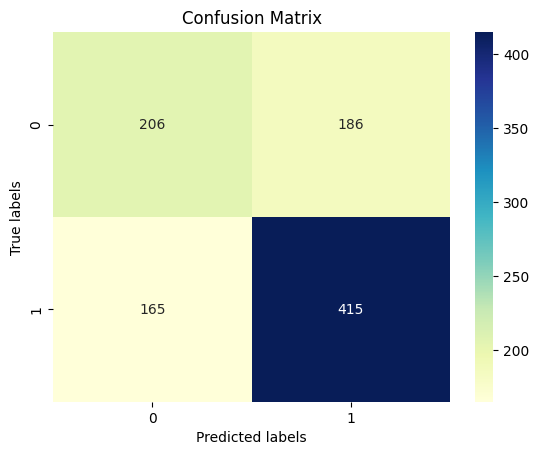

In [ ]:
#R-forest conf mat
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.6893004115226338
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58       392
           1       0.72      0.79      0.75       580

    accuracy                           0.69       972
   macro avg       0.68      0.66      0.67       972
weighted avg       0.68      0.69      0.68       972



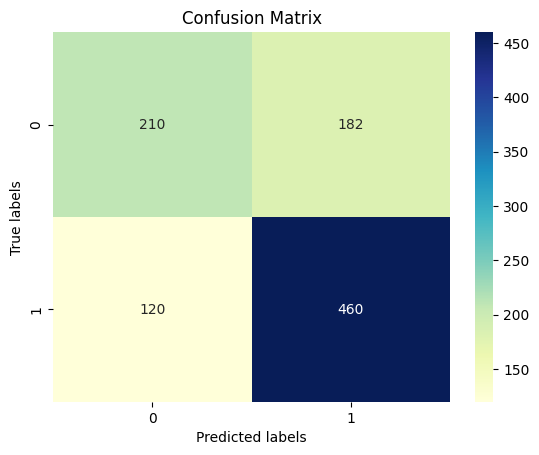

In [ ]:
#XGB boost

X=df_sam.drop(['Is_laundering','Laundering_type','Time','Date'],axis=1)
y=df_sam['Is_laundering']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.5967078189300411
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.60      1.00      0.75       580

    accuracy                           0.60       972
   macro avg       0.30      0.50      0.37       972
weighted avg       0.36      0.60      0.45       972



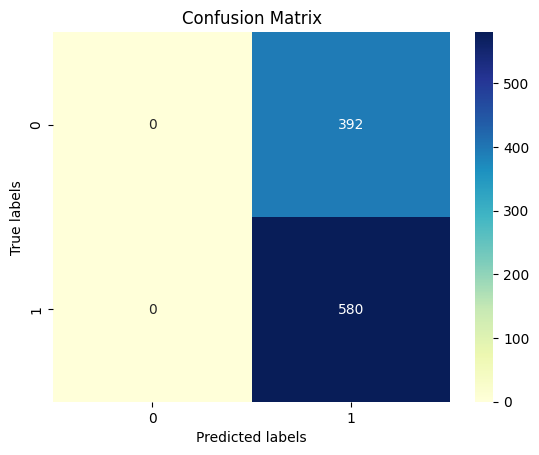

In [ ]:
#SVC

from sklearn.svm import SVC
X=df_sam.drop(['Is_laundering','Laundering_type','Time','Date'],axis=1)
y=df_sam['Is_laundering']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVC classifier
svc_classifier = SVC()

# Train the classifier
svc_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svc_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap for confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variables (y)
X = df_sam.drop(['Is_laundering', 'Laundering_type', 'Time', 'Date'], axis=1)
y_is_laundering = df_sam['Is_laundering']
y_laundering_type = df_sam['Laundering_type']

# Split the dataset into training and testing sets for both target variables
X_train, X_test, y_train_is_laundering, y_test_is_laundering = train_test_split(
    X, y_is_laundering, test_size=0.2, random_state=42
)
X_train, X_test, y_train_laundering_type, y_test_laundering_type = train_test_split(
    X, y_laundering_type, test_size=0.2, random_state=42
)

# Initialize a Random Forest classifier for Is_laundering target variable
rf_classifier_is_laundering = RandomForestClassifier()
rf_classifier_is_laundering.fit(X_train, y_train_is_laundering)

# Make predictions for Is_laundering target variable
y_pred_is_laundering = rf_classifier_is_laundering.predict(X_test)

# Evaluate the performance of the model for Is_laundering target variable
print("Classification Report for Is_laundering:")
print(classification_report(y_test_is_laundering, y_pred_is_laundering))

# Initialize a Random Forest classifier for Laundering_type target variable
rf_classifier_laundering_type = RandomForestClassifier()
rf_classifier_laundering_type.fit(X_train, y_train_laundering_type)

# Make predictions for Laundering_type target variable
y_pred_laundering_type = rf_classifier_laundering_type.predict(X_test)

# Evaluate the performance of the model for Laundering_type target variable
print("Classification Report for Laundering_type:")
print(classification_report(y_test_laundering_type, y_pred_laundering_type))

Classification Report for Is_laundering:
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       392
           1       0.70      0.80      0.75       580

    accuracy                           0.68       972
   macro avg       0.66      0.65      0.65       972
weighted avg       0.67      0.68      0.67       972

Classification Report for Laundering_type:
              precision    recall  f1-score   support

           0       0.39      0.31      0.35        35
           1       0.55      0.87      0.67        39
           2       0.17      0.18      0.18        39
           3       0.76      0.74      0.75        35
           4       0.31      0.26      0.28        42
           5       0.44      0.38      0.41        29
           6       0.19      0.17      0.18        36
           7       0.34      0.39      0.36        31
           8       0.00      0.00      0.00        40
           9       0.08      0.10      0.09     

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for Is_laundering target variable
accuracy_is_laundering = accuracy_score(y_test_is_laundering, y_pred_is_laundering)
print("Accuracy for Is_laundering:", accuracy_is_laundering)

# Calculate the accuracy for Laundering_type target variable
accuracy_laundering_type = accuracy_score(y_test_laundering_type, y_pred_laundering_type)
print("Accuracy for Laundering_type:", accuracy_laundering_type)

Accuracy for Is_laundering: 0.676954732510288
Accuracy for Laundering_type: 0.31069958847736623


Accuracy for Is_laundering: 0.6893004115226338
Accuracy for Laundering_type: 0.36728395061728397
Classification Report for Is_laundering:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58       392
           1       0.72      0.79      0.75       580

    accuracy                           0.69       972
   macro avg       0.68      0.66      0.67       972
weighted avg       0.68      0.69      0.68       972

Classification Report for Laundering_type:
              precision    recall  f1-score   support

           0       0.44      0.43      0.43        35
           1       0.78      0.79      0.78        39
           2       0.38      0.38      0.38        39
           3       0.83      0.86      0.85        35
           4       0.34      0.31      0.33        42
           5       0.48      0.45      0.46        29
           6       0.42      0.36      0.39        36
           7       0.61      0.74      0.67        31
     

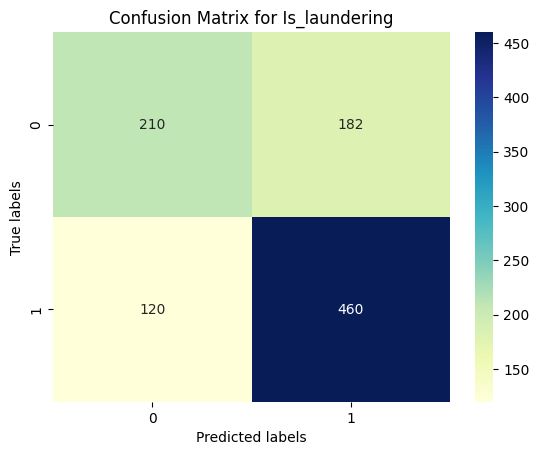

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target variables (y)
X = df_sam.drop(['Is_laundering', 'Laundering_type', 'Time', 'Date'], axis=1)
y_is_laundering = df_sam['Is_laundering']
y_laundering_type = df_sam['Laundering_type']

# Split the dataset into training and testing sets for each target variable
X_train, X_test, y_train_is_laundering, y_test_is_laundering = train_test_split(
    X, y_is_laundering, test_size=0.2, random_state=42
)
X_train, X_test, y_train_laundering_type, y_test_laundering_type = train_test_split(
    X, y_laundering_type, test_size=0.2, random_state=42
)

# Initialize XGBoost classifiers for each target variable
xgb_classifier_is_laundering = XGBClassifier()
xgb_classifier_laundering_type = XGBClassifier()

# Train the classifiers for each target variable
xgb_classifier_is_laundering.fit(X_train, y_train_is_laundering)
xgb_classifier_laundering_type.fit(X_train, y_train_laundering_type)

# Make predictions for each target variable
y_pred_is_laundering = xgb_classifier_is_laundering.predict(X_test)
y_pred_laundering_type = xgb_classifier_laundering_type.predict(X_test)

# Calculate accuracy for each target variable
accuracy_is_laundering = accuracy_score(y_test_is_laundering, y_pred_is_laundering)
accuracy_laundering_type = accuracy_score(y_test_laundering_type, y_pred_laundering_type)
print("Accuracy for Is_laundering:", accuracy_is_laundering)
print("Accuracy for Laundering_type:", accuracy_laundering_type)

# Print classification report for each target variable
print("Classification Report for Is_laundering:")
print(classification_report(y_test_is_laundering, y_pred_is_laundering))
print("Classification Report for Laundering_type:")
print(classification_report(y_test_laundering_type, y_pred_laundering_type))

# Plot confusion matrix for Is_laundering
conf_matrix_is_laundering = confusion_matrix(y_test_is_laundering, y_pred_is_laundering)
sns.heatmap(conf_matrix_is_laundering, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Is_laundering')
plt.show()

Accuracy for Is_laundering: 0.5967078189300411
Accuracy for Laundering_type: 0.043209876543209874
Classification Report for Is_laundering:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.60      1.00      0.75       580

    accuracy                           0.60       972
   macro avg       0.30      0.50      0.37       972
weighted avg       0.36      0.60      0.45       972



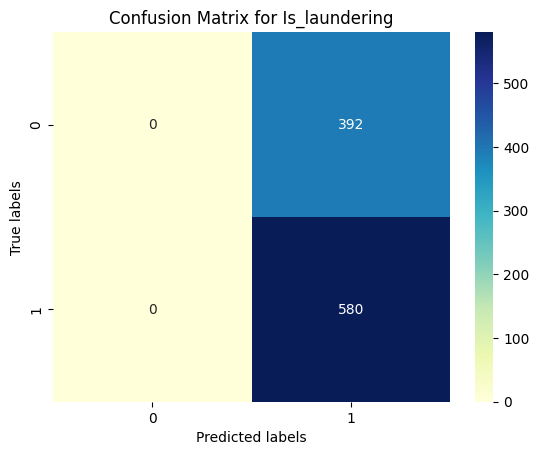

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target variables (y)
X = df_sam.drop(['Is_laundering', 'Laundering_type', 'Time', 'Date'], axis=1)
y_is_laundering = df_sam['Is_laundering']
y_laundering_type = df_sam['Laundering_type']

# Split the dataset into training and testing sets for each target variable
X_train, X_test, y_train_is_laundering, y_test_is_laundering = train_test_split(
    X, y_is_laundering, test_size=0.2, random_state=42
)
X_train, X_test, y_train_laundering_type, y_test_laundering_type = train_test_split(
    X, y_laundering_type, test_size=0.2, random_state=42
)

# Initialize SVC classifiers for each target variable
svc_classifier_is_laundering = SVC()
svc_classifier_laundering_type = SVC()

# Train the classifiers for each target variable
svc_classifier_is_laundering.fit(X_train, y_train_is_laundering)
svc_classifier_laundering_type.fit(X_train, y_train_laundering_type)

# Predict on the testing data for each target variable
y_pred_is_laundering = svc_classifier_is_laundering.predict(X_test)
y_pred_laundering_type = svc_classifier_laundering_type.predict(X_test)

# Evaluate the models for each target variable
accuracy_is_laundering = accuracy_score(y_test_is_laundering, y_pred_is_laundering)
accuracy_laundering_type = accuracy_score(y_test_laundering_type, y_pred_laundering_type)
print("Accuracy for Is_laundering:", accuracy_is_laundering)
print("Accuracy for Laundering_type:", accuracy_laundering_type)

# Print classification report for each target variable
print("Classification Report for Is_laundering:")
print(classification_report(y_test_is_laundering, y_pred_is_laundering))

# Plot confusion matrix for Is_laundering
conf_matrix_is_laundering = confusion_matrix(y_test_is_laundering, y_pred_is_laundering)
sns.heatmap(conf_matrix_is_laundering, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Is_laundering')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd

# Assuming df_sam is your DataFrame

# Drop datetime columns from X
X = df_sam.drop(columns=['Is_laundering', 'Laundering_type', 'Date','Time'])

# Extract target variable y
y = df_sam['Is_laundering']

# One-hot encode categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (excluding datetime columns)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Build the ANN model
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Convert to 1D array if necessary
y_pred = y_pred.flatten()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n",conf_matrix)



Epoch 1/20
55/55 [==============================] - 6s 8ms/step - loss: 23.5256 - accuracy: 0.5181 - val_loss: 3.1036 - val_accuracy: 0.6041
Epoch 2/20
55/55 [==============================] - 0s 4ms/step - loss: 7.1202 - accuracy: 0.5236 - val_loss: 4.8536 - val_accuracy: 0.6041
Epoch 3/20
55/55 [==============================] - 0s 4ms/step - loss: 4.0659 - accuracy: 0.5336 - val_loss: 0.6757 - val_accuracy: 0.6041
Epoch 4/20
55/55 [==============================] - 0s 4ms/step - loss: 2.3812 - accuracy: 0.5159 - val_loss: 1.0476 - val_accuracy: 0.6041
Epoch 5/20
55/55 [==============================] - 0s 4ms/step - loss: 1.6471 - accuracy: 0.5170 - val_loss: 0.6776 - val_accuracy: 0.6041
Epoch 6/20
55/55 [==============================] - 0s 4ms/step - loss: 1.1814 - accuracy: 0.5196 - val_loss: 0.7493 - val_accuracy: 0.3959
Epoch 7/20
55/55 [==============================] - 0s 4ms/step - loss: 1.0198 - accuracy: 0.5279 - val_loss: 0.7011 - val_accuracy: 0.3959
Epoch 8/20
55/55 [=

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd

# Assuming df_sam is your DataFrame

# Drop datetime columns from X
X = df_sam.drop(columns=['Is_laundering', 'Laundering_type', 'Date','Time'])

# Extract target variable y
y = df_sam['Laundering_type']

# One-hot encode categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (excluding datetime columns)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Build the ANN model
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Convert to 1D array if necessary
y_pred = y_pred.flatten()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')  # Specify average='macro' here
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Epoch 1/20
55/55 [==============================] - 2s 7ms/step - loss: -66774.9062 - accuracy: 0.0360 - val_loss: -264198.2188 - val_accuracy: 0.0334
Epoch 2/20
55/55 [==============================] - 0s 4ms/step - loss: -1303401.2500 - accuracy: 0.0360 - val_loss: -3463392.0000 - val_accuracy: 0.0334
Epoch 3/20
55/55 [==============================] - 0s 4ms/step - loss: -9413365.0000 - accuracy: 0.0360 - val_loss: -19091892.0000 - val_accuracy: 0.0334
Epoch 4/20
55/55 [==============================] - 0s 8ms/step - loss: -38408512.0000 - accuracy: 0.0360 - val_loss: -66287764.0000 - val_accuracy: 0.0334
Epoch 5/20
55/55 [==============================] - 0s 8ms/step - loss: -112169688.0000 - accuracy: 0.0360 - val_loss: -175411408.0000 - val_accuracy: 0.0334
Epoch 6/20
55/55 [==============================] - 0s 8ms/step - loss: -266107328.0000 - accuracy: 0.0360 - val_loss: -386401728.0000 - val_accuracy: 0.0334
Epoch 7/20
55/55 [==============================] - 1s 11ms/step - l